# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'api.openweathermap.org/data/2.5/forecast/daily?q={city}&appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url= f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    city_responses = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | newman
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | olinda
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | labrador city
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | juneau
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | sheridan
Processing Record 15 of Set 1 | libourne
Processing Record 16 of Set 1 | holmsund
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | sisimiut
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Se

Processing Record 41 of Set 4 | las terrenas
Processing Record 42 of Set 4 | fuling
Processing Record 43 of Set 4 | nsanje
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | arawa
Processing Record 46 of Set 4 | egilsstadir
Processing Record 47 of Set 4 | grovetown
Processing Record 48 of Set 4 | barkot
Processing Record 49 of Set 4 | poxoreo
Processing Record 0 of Set 5 | qinzhou
Processing Record 1 of Set 5 | ak-dovurak
Processing Record 2 of Set 5 | itamaraca
Processing Record 3 of Set 5 | sungai penuh
Processing Record 4 of Set 5 | cabeza del buey
Processing Record 5 of Set 5 | bahia de kino
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | choibalsan
Processing Record 8 of Set 5 | soroti
Processing Record 9 of Set 5 | fale old settlement
Processing Record 10 of Set 5 | dangriga
Processing Record 11 of Set 5 | monkey bay
Processing Record 12 of Set 5 | krasnogvardeyskoye
Processing Record 13 of Set 5 | tadine
Processing Record 14 of Set 5 

Processing Record 31 of Set 8 | bangar
Processing Record 32 of Set 8 | sweetwater
Processing Record 33 of Set 8 | iquique
Processing Record 34 of Set 8 | sicuani
Processing Record 35 of Set 8 | howard springs
Processing Record 36 of Set 8 | ternate
Processing Record 37 of Set 8 | kulia village
City not found. Skipping...
Processing Record 38 of Set 8 | kilju
Processing Record 39 of Set 8 | dongning
Processing Record 40 of Set 8 | swakopmund
Processing Record 41 of Set 8 | kandi
Processing Record 42 of Set 8 | micheweni
Processing Record 43 of Set 8 | toga village
City not found. Skipping...
Processing Record 44 of Set 8 | bamboo flat
Processing Record 45 of Set 8 | aral
Processing Record 46 of Set 8 | christchurch
Processing Record 47 of Set 8 | chimbote
Processing Record 48 of Set 8 | anna regina
Processing Record 49 of Set 8 | rukban
City not found. Skipping...
Processing Record 0 of Set 9 | petrozavodsk
Processing Record 1 of Set 9 | tosontsengel
Processing Record 2 of Set 9 | pervo

Processing Record 17 of Set 12 | santa ana
Processing Record 18 of Set 12 | vega de alatorre
Processing Record 19 of Set 12 | martuk
Processing Record 20 of Set 12 | urangan
Processing Record 21 of Set 12 | daura
Processing Record 22 of Set 12 | yallahs
Processing Record 23 of Set 12 | pacific grove
Processing Record 24 of Set 12 | karatuzskoye
Processing Record 25 of Set 12 | ferkessedougou
Processing Record 26 of Set 12 | chaah
Processing Record 27 of Set 12 | itamaraju
Processing Record 28 of Set 12 | kabalo
Processing Record 29 of Set 12 | port douglas
Processing Record 30 of Set 12 | tolanaro
Processing Record 31 of Set 12 | fort st. john
Processing Record 32 of Set 12 | laborde
Processing Record 33 of Set 12 | altpinar
Processing Record 34 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 35 of Set 12 | lamu
Processing Record 36 of Set 12 | am djarass
City not found. Skipping...
Processing Record 37 of Set 12 | surin
Processing Record 38 of Set 12 | guerrero negro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,8.79,93,95,3.58,NZ,1689905669
1,newman,37.3138,-121.0208,37.19,10,0,3.56,US,1689905669
2,port-aux-francais,-49.3500,70.2167,1.71,54,96,14.29,TF,1689905670
3,yellowknife,62.4560,-114.3525,26.98,44,100,4.63,CA,1689905428
4,olinda,-8.0089,-34.8553,25.85,73,75,6.69,BR,1689905525


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.79,93,95,3.58,NZ,1689905669
1,newman,37.3138,-121.0208,37.19,10,0,3.56,US,1689905669
2,port-aux-francais,-49.3500,70.2167,1.71,54,96,14.29,TF,1689905670
3,yellowknife,62.4560,-114.3525,26.98,44,100,4.63,CA,1689905428
4,olinda,-8.0089,-34.8553,25.85,73,75,6.69,BR,1689905525


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

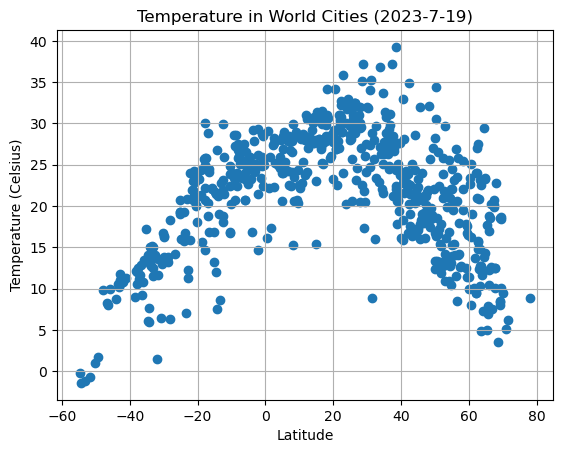

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities (2023-7-19)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("OUTPUT/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

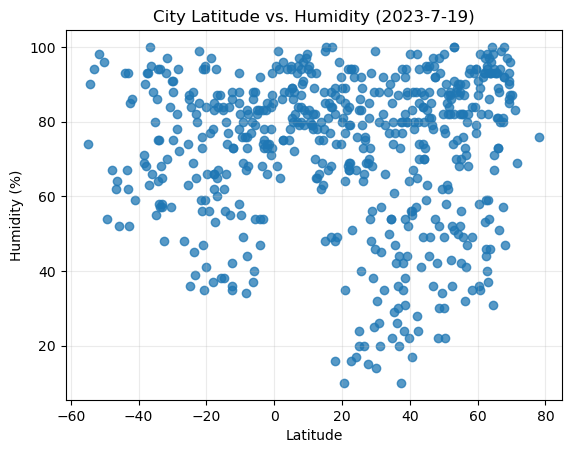

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-7-19)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

# Save the figure
plt.savefig("OUTPUT/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

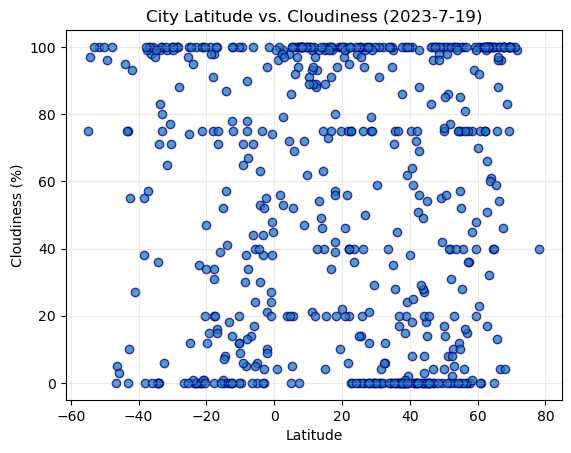

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='darkblue', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-7-19)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

# Save the figure
plt.savefig("OUTPUT/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

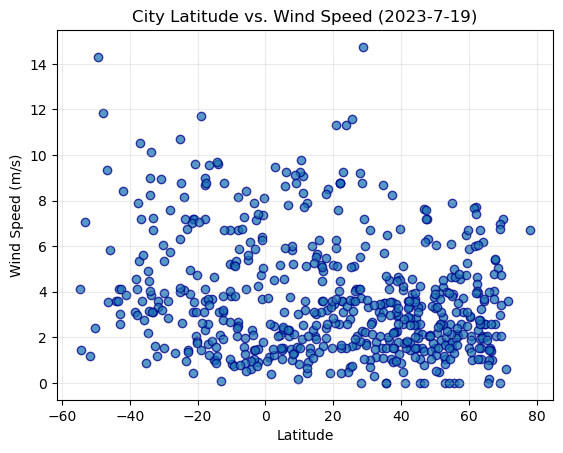

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='darkblue', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-7-19)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(alpha = 0.25)

# Save the figure
plt.savefig("OUTPUT/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,newman,37.3138,-121.0208,37.19,10,0,3.56,US,1689905669
3,yellowknife,62.4560,-114.3525,26.98,44,100,4.63,CA,1689905428
7,labrador city,52.9463,-66.9114,10.95,100,20,1.03,CA,1689905672
8,albany,42.6001,-73.9662,22.55,74,56,1.43,US,1689905672
9,juneau,58.3019,-134.4197,22.00,49,75,3.09,US,1689905656


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.79,93,95,3.58,NZ,1689905669
2,port-aux-francais,-49.3500,70.2167,1.71,54,96,14.29,TF,1689905670
4,olinda,-8.0089,-34.8553,25.85,73,75,6.69,BR,1689905525
5,east london,-33.0153,27.9116,12.48,57,100,6.73,ZA,1689905671
6,ushuaia,-54.8000,-68.3000,-0.19,74,75,4.12,AR,1689905479


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6300837827571899


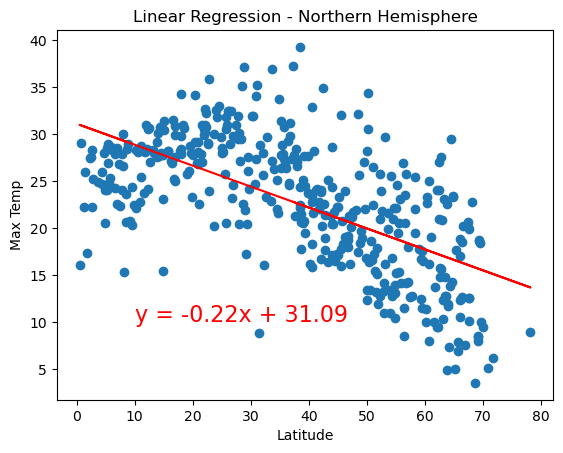

y = -0.22x + 31.09


In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, (x_values * slope + intercept), "r-")
plt.annotate(line_eq, xy=(10,10),fontsize=16,color="red")
plt.title("Linear Regression - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

print(line_eq)

The r-value is: 0.8306094799034739


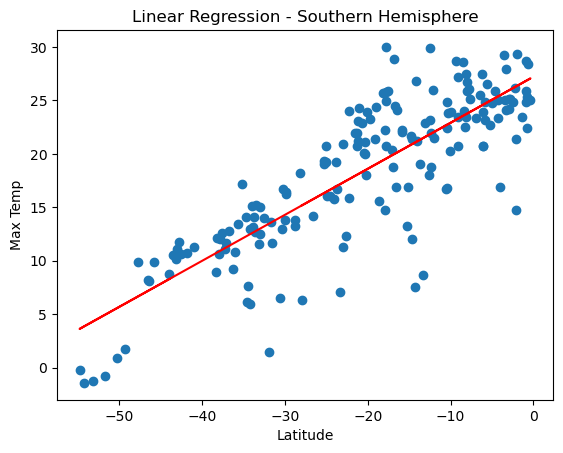

y = 0.43x + 27.21


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, (x_values * slope + intercept), "r-")
plt.annotate(line_eq, xy=(-25,-5), fontsize=16,color="red")
plt.title("Linear Regression - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

print(line_eq)

**Discussion about the linear relationship:** 
Northern Hemisphere: The r-value is -0.68, which indicates a negative relationship between Latitude and Maximum Temperature in the Northern Hemisphere. This means that the maximum temperature increases as the latitude decreases. 

Southern Hemisphere: The r-value is 0.83, which indicates a positive relationship between Latitude and Maximum Temperature in the Southern Hemisphere. This means that the maximum temperature increases with an increase in latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03311974264698435


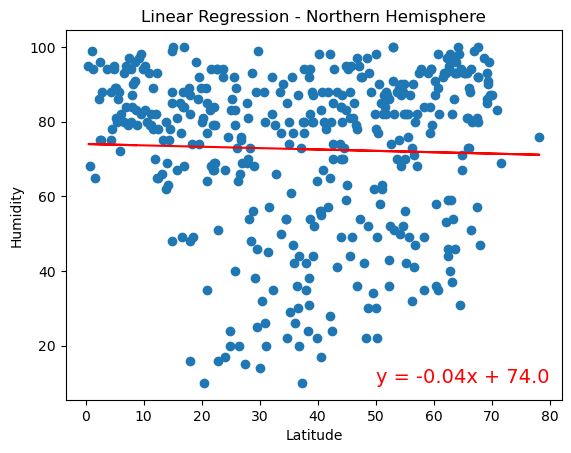

y = -0.04x + 74.0


In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, (x_values * slope + intercept), "r-")
plt.annotate(line_eq,xy=(50,10), fontsize=14, color="red")
plt.title("Linear Regression - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

print(line_eq)

The r-value is: -0.09069282386227467


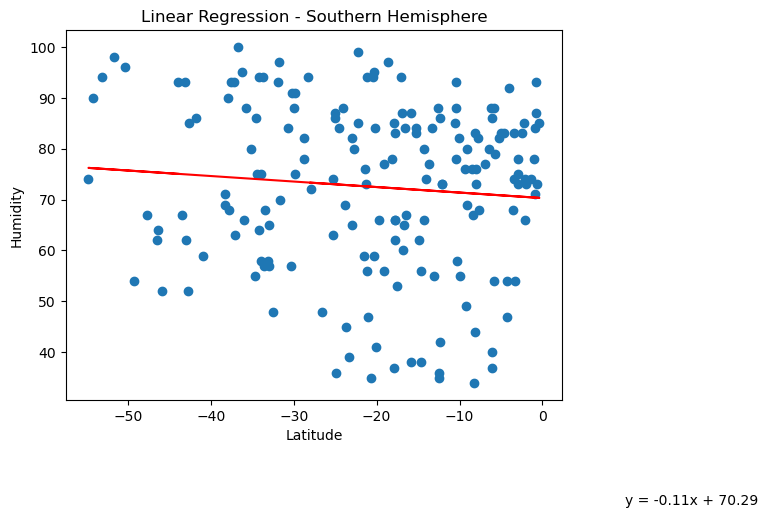

y = -0.11x + 70.29


In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, (x_values * slope + intercept), "r-")
plt.annotate(line_eq,xy=(-55,30), fontsize=16, color="red")
plt.text(10, 10, line_eq)
plt.title("Linear Regression - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

print(line_eq)

**Discussion about the linear relationship:** 
Northern Hemisphere: The r-value is -0.03, which indicates a neutral relationship between Latitude and Humidity in the Northern Hemisphere. This means that there is no correlation between the two. 

Southern Hemisphere: The r-value is -0.09 , which indicates a neutral relationship between Latitude and Humidity in the Southern Hemisphere. This means that there is no correlation between the two. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.05034659138493409


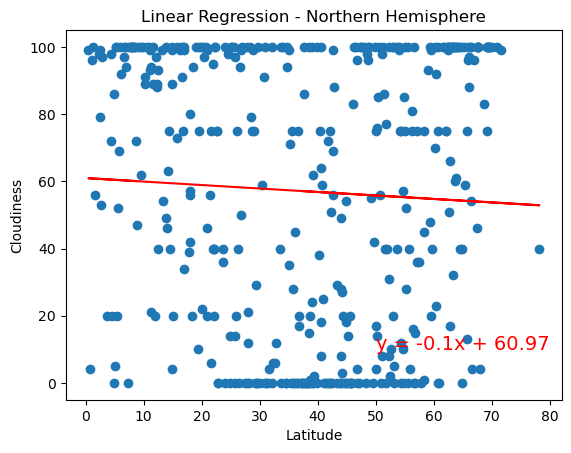

y = -0.1x + 60.97


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, (x_values * slope + intercept), "r-")
plt.annotate(line_eq,xy=(50,10), fontsize=14, color="red")
plt.title("Linear Regression - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

print(line_eq)

The r-value is: -0.27879717509124047


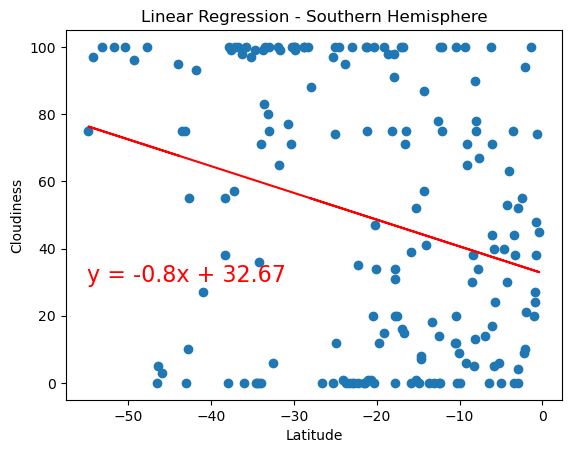

y = -0.8x + 32.67


In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, (x_values * slope + intercept), "r-")
plt.annotate(line_eq,xy=(-55,30), fontsize=16, color="red")
plt.title("Linear Regression - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

print(line_eq)

**Discussion about the linear relationship:** 
Northern Hemisphere: The r-value is -0.05, which indicates a neutral relationship between Cloudiness and Humidity in the Northern Hemisphere. This means that there is no correlation between the two. 

Southern Hemisphere: The r-value is -0.28 , which indicates a neutral relationship between Latitude and Cloudiness in the Southern Hemisphere. This means that there is no correlation between the two. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11953228242119454


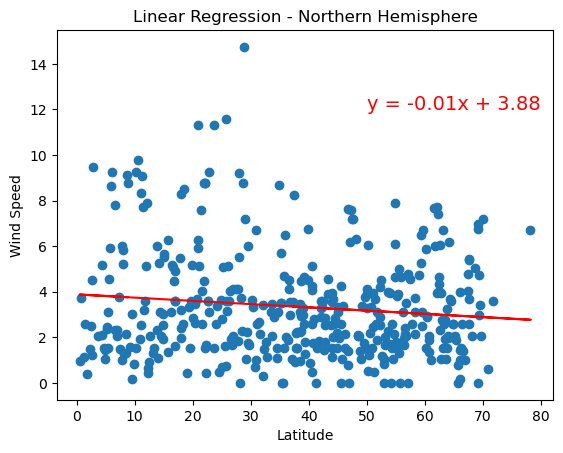

y = -0.01x + 3.88


In [23]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, (x_values * slope + intercept), "r-")
plt.annotate(line_eq,xy=(50,12), fontsize=14, color="red")
plt.title("Linear Regression - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

print(line_eq)

The r-value is: -0.15803239242477818


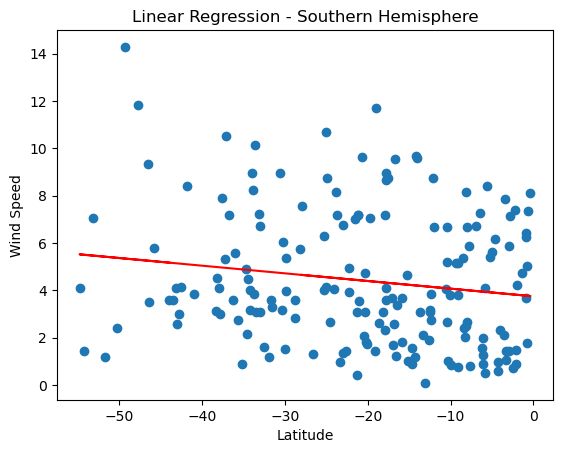

y = -0.03x + 3.75


In [24]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values, (x_values * slope + intercept), "r-")
plt.annotate(line_eq,xy=(-55,30), fontsize=16, color="red")
plt.title("Linear Regression - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

print(line_eq)

**Discussion about the linear relationship:** 
Northern Hemisphere: The r-value is -0.12, which indicates a neutral relationship between Latitude and Wind Speed in the Northern Hemisphere. This means that there is no correlation between the two. 

Southern Hemisphere: The r-value is -0.16 , which indicates a neutral relationship between Latitude and Wind Speed in the Southern Hemisphere. This means that there is no correlation between the two. 